In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/graph.csv')
df

,source,target,relation
0,1,BC133,uses
1,2,BC133,uses
2,3,BC133,uses
3,4,BC133,uses
4,1,BC473,uses
...,...,...,...
132969,T040S,BC618,enables
132970,T040T,BC618,enables
132971,T042Z,BC618,enables
132972,T043,BC313,enables


In [9]:
items = df[(df['relation'] == 'uses') & (df['source']=='4')]['target'].unique()
items

array(['BC133', 'BC473', 'BC693', 'BC314', 'BC413', 'BC486', 'BC324',
       'BC673', 'BC264', 'BC239', 'BC686', 'BC083', 'BC248', 'BC244',
       'BC628', 'BC420', 'BC225', 'BC454', 'BC681', 'BC721', 'BC452',
       'BC183', 'BC308', 'BC012', 'BC160', 'BC607', 'BC178', 'BC303',
       'BC157', 'BC174', 'BC727', 'BC288', 'BC306', 'BC304', 'BC320',
       'BC322', 'BC079', 'BC606', 'BC624', 'BC312', 'BC073', 'BC282',
       'BC279', 'BC067', 'BC537', 'BC525', 'BC093', 'BC077', 'BC195',
       'BC245', 'BC685', 'BC477', 'BC166', 'BC126', 'BC095', 'BC074',
       'BC235', 'BC722', 'BC549', 'BC660', 'BC065', 'BC382', 'BC548',
       'BC223', 'BC326', 'BC605', 'BC656', 'BC163', 'BC056', 'BC103',
       'BC112', 'BC502', 'BC251', 'BC618', 'BC517', 'BC297', 'BC273',
       'BC697', 'BC276', 'BC446', 'BC313', 'BC622'], dtype=object)

In [13]:
'BC019' in items

False

{1: [0.31234, 0.62468, 1.24936], 5: [0.22432, 0.44864, 0.89728], 10: [0.32343, 0.64686, 1.29372], 15: [0.42343, 0.84686, 1.69372], 20: [0.52341, 1.04682, 2.09364]}


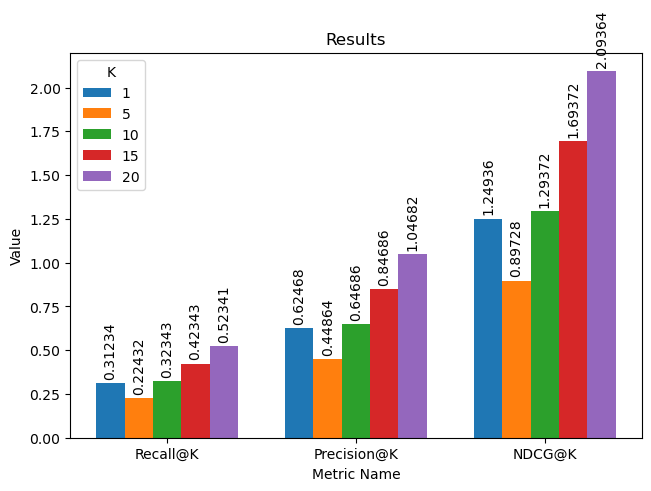

In [32]:
K = [1, 5, 10, 15, 20]
recalls = [.31234,.22432,.32343,.42343,.52341]
precisions = [recall*2 for recall in recalls]
ndcgs = [prec*2 for prec in precisions]

# plot_dict = {
#     'Recall': recalls,
#     'Precision': precisions,
#     'NDCG': ndcgs
# }

plot_dict={}
for i, k in enumerate(K):
    plot_dict[k] = [recalls[i], precisions[i], ndcgs[i]]
    
print(plot_dict)

metrics = ['Recall@K', 'Precision@K', 'NDCG@K']

fig, ax = plt.subplots(layout='constrained')

x = np.arange(len(metrics))  # the label locations
width = 0.15  # the width of the bars
multiplier = 0

for metric, val in plot_dict.items():
    metric = str(metric)
    offset = width * multiplier
    rects = ax.bar(x + offset, val, width, label=metric)
    ax.bar_label(rects, padding=3, rotation='vertical', label_type='edge')
    multiplier += 1

ax.set_xlabel('Metric Name')
ax.set_ylabel('Value')
ax.set_title('Results')
ax.set_xticks(x + width*2, metrics)
ax.legend(title='K')
plt.show()